<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-de-données-exploratoire" data-toc-modified-id="Analyse-de-données-exploratoire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse de données exploratoire</a></span><ul class="toc-item"><li><span><a href="#Chargement-des-librairies-utiles" data-toc-modified-id="Chargement-des-librairies-utiles-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chargement des librairies utiles</a></span></li><li><span><a href="#Lecture-de-la-donnée" data-toc-modified-id="Lecture-de-la-donnée-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lecture de la donnée</a></span></li><li><span><a href="#Décrire-la-donnée" data-toc-modified-id="Décrire-la-donnée-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Décrire la donnée</a></span></li><li><span><a href="#Vérifier-les-dimensions-et-les-colonnes-présentes" data-toc-modified-id="Vérifier-les-dimensions-et-les-colonnes-présentes-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Vérifier les dimensions et les colonnes présentes</a></span></li><li><span><a href="#Vérifier-la-présence-de-valeurs-manquantes" data-toc-modified-id="Vérifier-la-présence-de-valeurs-manquantes-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Vérifier la présence de valeurs manquantes</a></span></li><li><span><a href="#Visualisation-des-données-qualitatives-à-l'aide-de-barplots" data-toc-modified-id="Visualisation-des-données-qualitatives-à-l'aide-de-barplots-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Visualisation des données qualitatives à l'aide de barplots</a></span></li><li><span><a href="#Analyse-bivariée" data-toc-modified-id="Analyse-bivariée-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Analyse bivariée</a></span></li></ul></li><li><span><a href="#Préparation-des-donées" data-toc-modified-id="Préparation-des-donées-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Préparation des donées</a></span><ul class="toc-item"><li><span><a href="#OneHotEncoding-ou-OrdinalEncoding-des-variables-explicatives" data-toc-modified-id="OneHotEncoding-ou-OrdinalEncoding-des-variables-explicatives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>OneHotEncoding ou OrdinalEncoding des variables explicatives</a></span></li><li><span><a href="#Séparation-de-la-donnée" data-toc-modified-id="Séparation-de-la-donnée-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Séparation de la donnée</a></span></li><li><span><a href="#Mettez-à-la-même-echelle-les-variables-numériques" data-toc-modified-id="Mettez-à-la-même-echelle-les-variables-numériques-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mettez à la même echelle les variables numériques</a></span></li></ul></li><li><span><a href="#Modèle-simple" data-toc-modified-id="Modèle-simple-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modèle simple</a></span></li></ul></div>

# <center>Prédiction de la Performance Académique des Etudiants à l'Université</center>

![](https://neurosciencenews.com/files/2023/08/chatgpt-student-writing-neuroscoienc.jpg)

## Analyse de données exploratoire

### Chargement des librairies utiles

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

In [2]:
# ne modifier pas ce bout de code
seed = 42
random.seed(seed)
np.random.seed(seed)

### Lecture de la donnée

In [3]:
# charger le fichier data/education.csv et afficher les 5 premières lignes
education_df =pd.read_csv('data/education.csv')
education_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<b><p>Attributs</p></b>
1 Gender - sexe de l'étudiant (nominal : « Homme » ou « Femme »)

2 Nqtionqlity - nationalité de l'étudiant (nominal : « Koweït », « Liban », « Égypte », « Arabie Saoudite », « États-Unis », « Jordanie », « Venezuela », « Iran », « Tunis », « Maroc », « Syrie »). ',' Palestine', 'Irak', 'Lybie')

3 Place of birth - Lieu de naissance de l'étudiant (nominal : « Koweït », « Liban », « Égypte », « Arabie Saoudite », « États-Unis », « Jordanie », « Venezuela », « Iran », « Tunis », « Maroc »). ',' Syrie ',' Palestine ', ' Irak ', ' Libye ')

4 Educational Stages - le niveau d'éducation auquel appartient l'élève (nominal : « niveau inférieur », « MiddleSchool », « HighSchool »)

5 Grade Levels : l'élève appartient (nominal : 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07' ', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12')

6 Section ID - l'élève de la classe appartient (nominal : 'A', 'B', 'C')

7 Topic- sujet du cours (nominal : 'anglais', 'espagnol', 'français', 'arabe', 'informatique', 'mathématiques', 'chimie', 'biologie', 'science', 'histoire', 'Coran ',' Géologie')

8 Semester - semestre de l'année scolaire (nominal : « Premier », « Deuxième »)

9 Relation - Parent responsable de l’élève (nominal : « maman », « père »)

10 Raisedhqnds - combien de fois l'élève lève la main en classe (numérique : 0-100)

11- VisiTedResources - combien de fois l'étudiant visite un contenu de cours (numérique : 0-100)

12 AnnouncementsView - combien de fois l'étudiant vérifie les nouvelles annonces (numérique : 0-100)

13 Discussion  - combien de fois l'étudiant participe à des groupes de discussion (numérique : 0-100)

14 ParentAnsweringSurvey - le parent a répondu aux enquêtes fournies ou non par l'école (nominal : « Oui », « Non »)

15 ParentschoolSatisfaction - le degré de satisfaction des parents à l'égard de l'école (nominal : « Oui », « Non »)

16 StudentAbsenceDays - le nombre de jours d'absence pour chaque étudiant (nominal : au-dessus de 7 ans, moins de 7 ans)

17 Class - Les étudiants sont classés en trois intervalles numériques en fonction de leur note/note totale :
Low-Level (L): l'intervalle comprend des valeurs de 0 à 69,

Middle-Level (M): l'intervalle comprend les valeurs de 70 à 89,

High-Level(H) : l'intervalle comprend des valeurs comprises entre 90 et 100.

### Décrire la donnée


In [4]:
education_df = pd.DataFrame(education_df)

# Describe the dataframe
description = education_df.describe()
print(description)

       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


### Vérifier les dimensions et les colonnes présentes

In [5]:
# Check the dimensions (shape) of the dataframe
dimensions = education_df.shape
print("Dimensions of the dataframe: ", dimensions)

# Check the columns of the dataframe
columns = education_df.columns
print("Columns of the dataframe: ", columns)

Dimensions of the dataframe:  (480, 17)
Columns of the dataframe:  Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


### Vérifier la présence de valeurs manquantes

In [6]:
 # Utiliser la méthode `isnull()` et `sum()` pour afficher le nombre de valeurs manquantes par colonne :

print(education_df.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


### Visualisation des données qualitatives à l'aide de barplots

 1. Subplots de barplots pour les variables catégorielles avec des labels en pourcentage au-dessus des barres

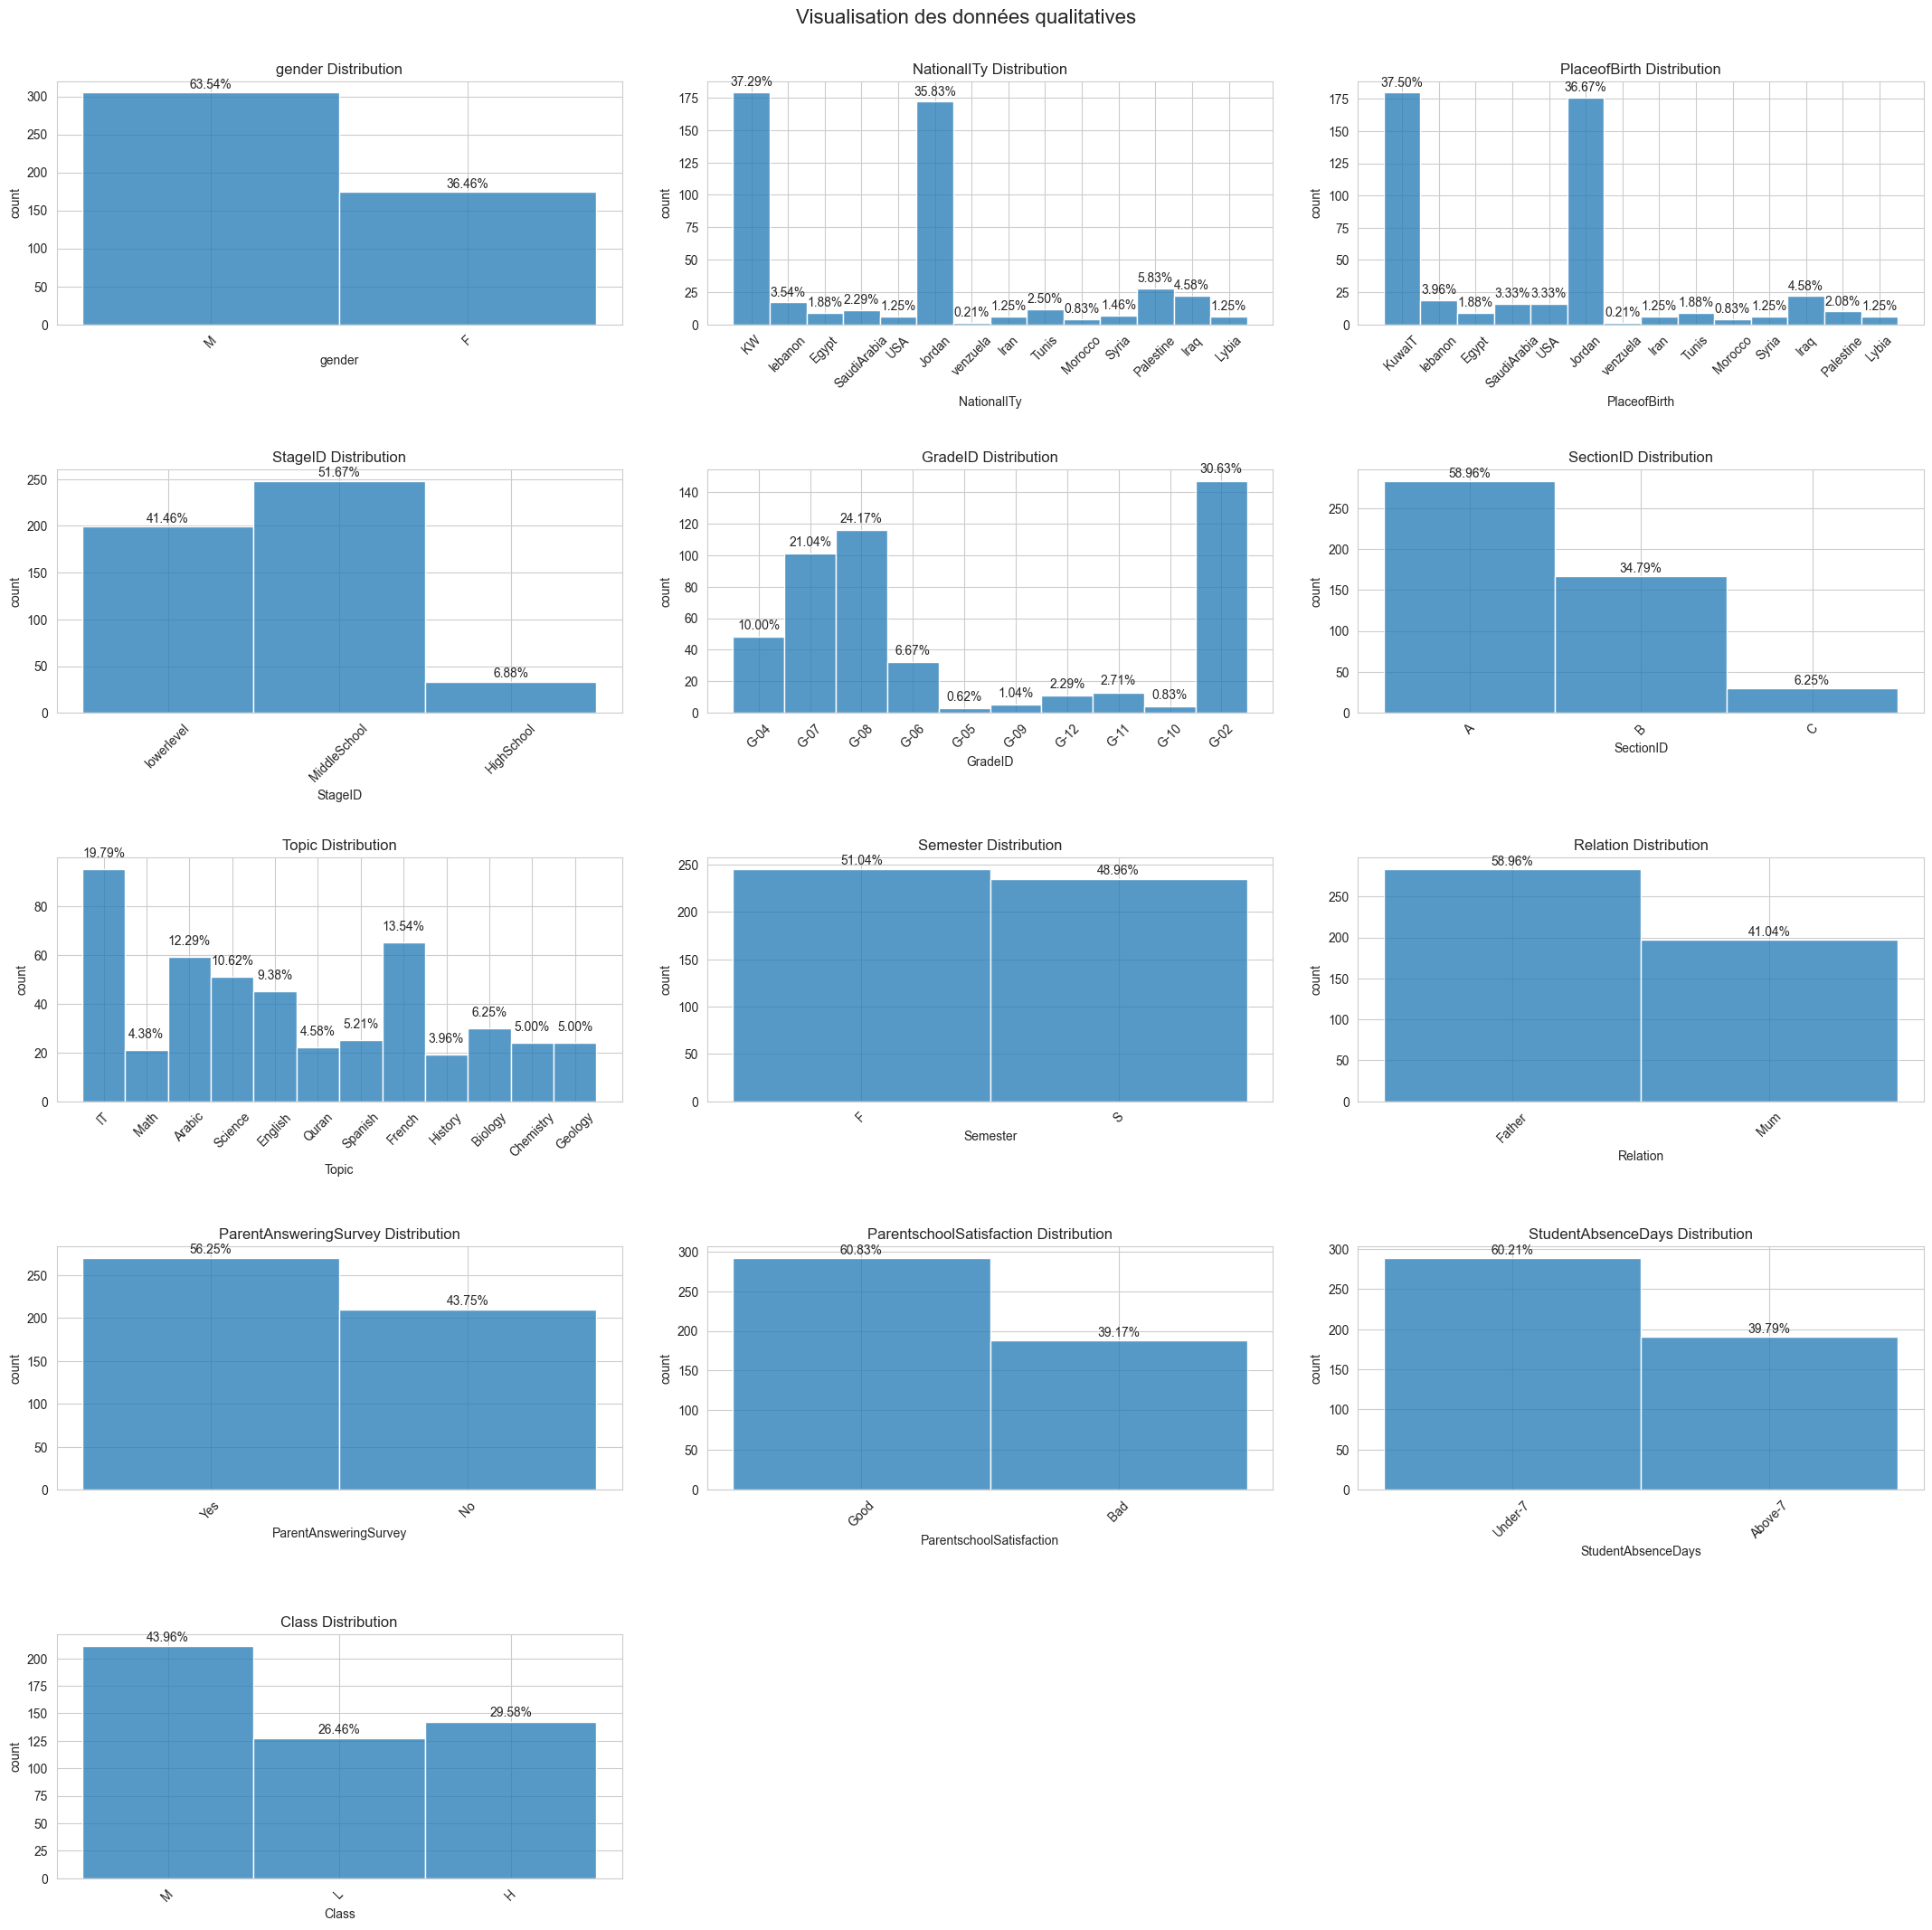

In [7]:
# Sélectionnez les colonnes qualitatives pour la visualisation
qualitative_columns = education_df.select_dtypes(exclude=[np.number]).columns

# Set up the subplots for visualization (Configurer la grille du subplot)
fig, axes = plt.subplots(5, 3, figsize=(22, 22))
fig.suptitle('Visualisation des données qualitatives', fontsize=16)

# la methode 'flatten' pour une itération facile
axes = axes.flatten()

# Créer le plot de distribution pour chaque variable numérique
for i, column in enumerate(qualitative_columns):
    sns.histplot(education_df[column], ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotating x-axis labels for better visibility
    
    # Display percentage on each bar
    total = float(len(education_df[column]))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 5, f'{height/total:.2%}', ha="center")
        
        
        # Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout and display the plot
plt.tight_layout(pad=3)  # Increase the pad value for spacing between the subtitle and plots
plt.show()

### Analyse bivariée

# Etudier la relation entre chaque variable et la variable d'intérêt


<Figure size 1200x1000 with 0 Axes>

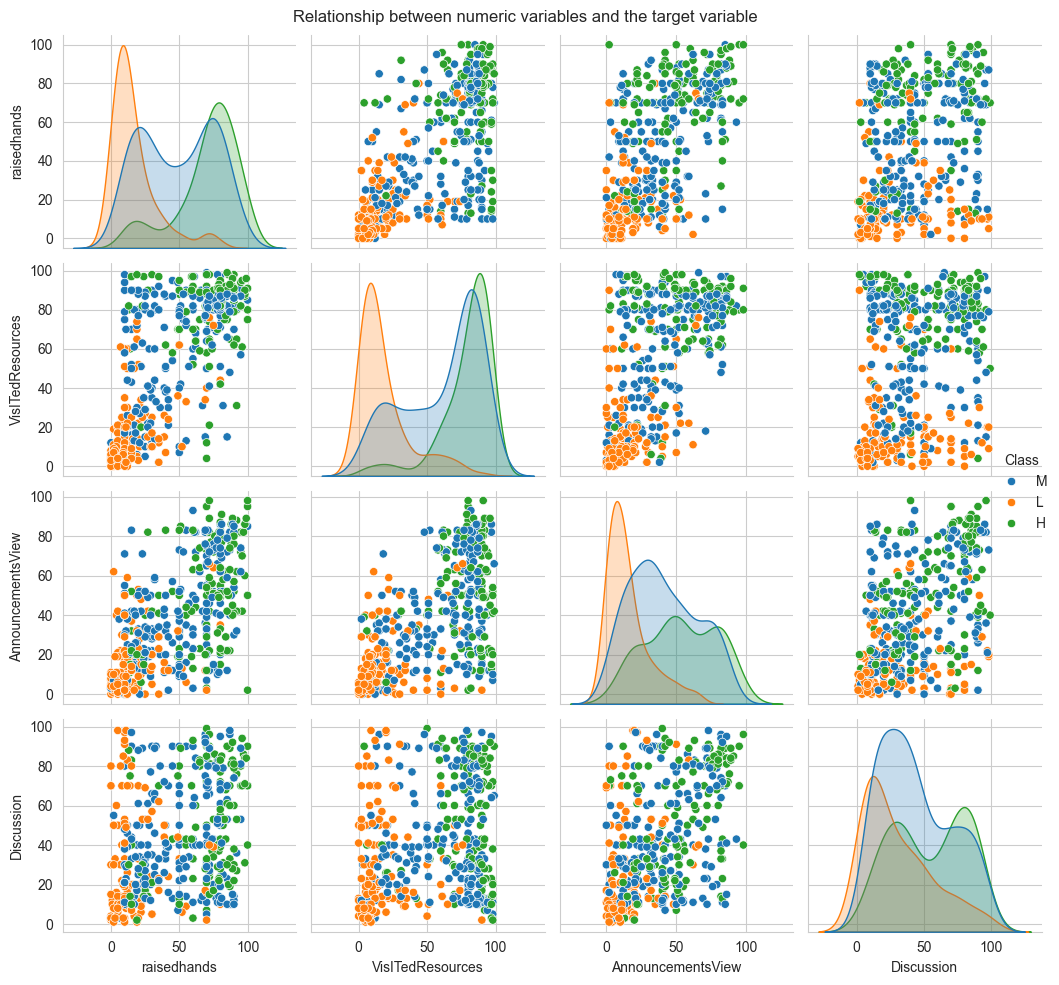

In [8]:

# Select the numeric variables
numeric_variables = education_df.select_dtypes(include=[np.number]).columns # variables qualitative

# Créer la figure et les axes
plt.figure(figsize=(12, 10))
# Create the pairplot
sns.pairplot(education_df, vars=numeric_variables, hue='Class') # "Class" is the target variable because it is an indicator of a student's academic performance

# Ajouter un titre
plt.suptitle("Relationship between numeric variables and the target variable")
# Ajuster la mise en page
plt.tight_layout()
plt.show()

Le pairplot que j'ai créé montre les relations entre diverses variables liées à l'engagement et à la performance des étudiants.Le plot expose quatre variables clés: raisedhands, VisITedResources, AnnouncementsView et Discussion, qui servent d'indicateurs d'activité et d'engagement des étudiants. Chaque variable est dessinée contre les autres, formant une matrice de scatterplots, tandis que la diagonale représente des parcelles de densité( density plot) pour chaque variable. 

Les points de données sont différenciés par la couleur en trois classes: M (bleu), L (orange) et H (vert), indiquant différents niveaux de performance des élèves (Medium, Low, and High). En observant le plan, nous pouvons discerner certaines tendances: les points verts (H) présentent généralement des valeurs plus élevées sur les deux axes, les points bleus (M) tombent dans la plage moyenne, et les points orange (L) ont tendance à être inférieurs. 

Nous pouvons interpréter les resultats en dissant que l'engagement des étudiants est en corrélation avec la performance, car un engagement plus élevé en termes de main levée, de visites de ressources, d'annonces vues et de participation aux discussions tend à améliorer la performance (indiquer par la presence de plus de point vert et blue ayant des valeurs elevees).

 En outre, il semble y avoir une corrélation positive entre les variables, ce qui suggère que les étudiants qui excellent dans une mesure d'engagement ont tendance à exceller dans d'autres aussi. Cependant, il existe une certaine superposition entre les classes, ce qui indique que bien que l'engagement soit important, il n'est pas le seul déterminant de la performance. La classe "L" (basses performances) a rapporté des clusters à des valeurs inférieures dans toutes les mesures, ce qui suggère que la faible participation dans plusieurs domaines pourrait fortement prédire une mauvaise performance. 
 
 Notamment, la séparation entre les classes est plus prononcée pour les variables "raisedhands" et "VisITedResources", ce qui implique que ce sont peut-être les indicateurs les plus forts de la performance des élèves. 
 
 D'apres ces resultats, nous pouvons identifier les élèves à risque tôt sur la base de mesures d'engagement, concevoir des interventions pour améliorer l'engageement des étudiants, et se concentrer sur la promotion de comportements qui ont la plus grande corrélation avec des performances élevées. 
 
 Il est important de se rappeler, cependant, que la corrélation n'implique pas la causalité, et d'autres facteurs peuvent également influer sur la performance des élèves.

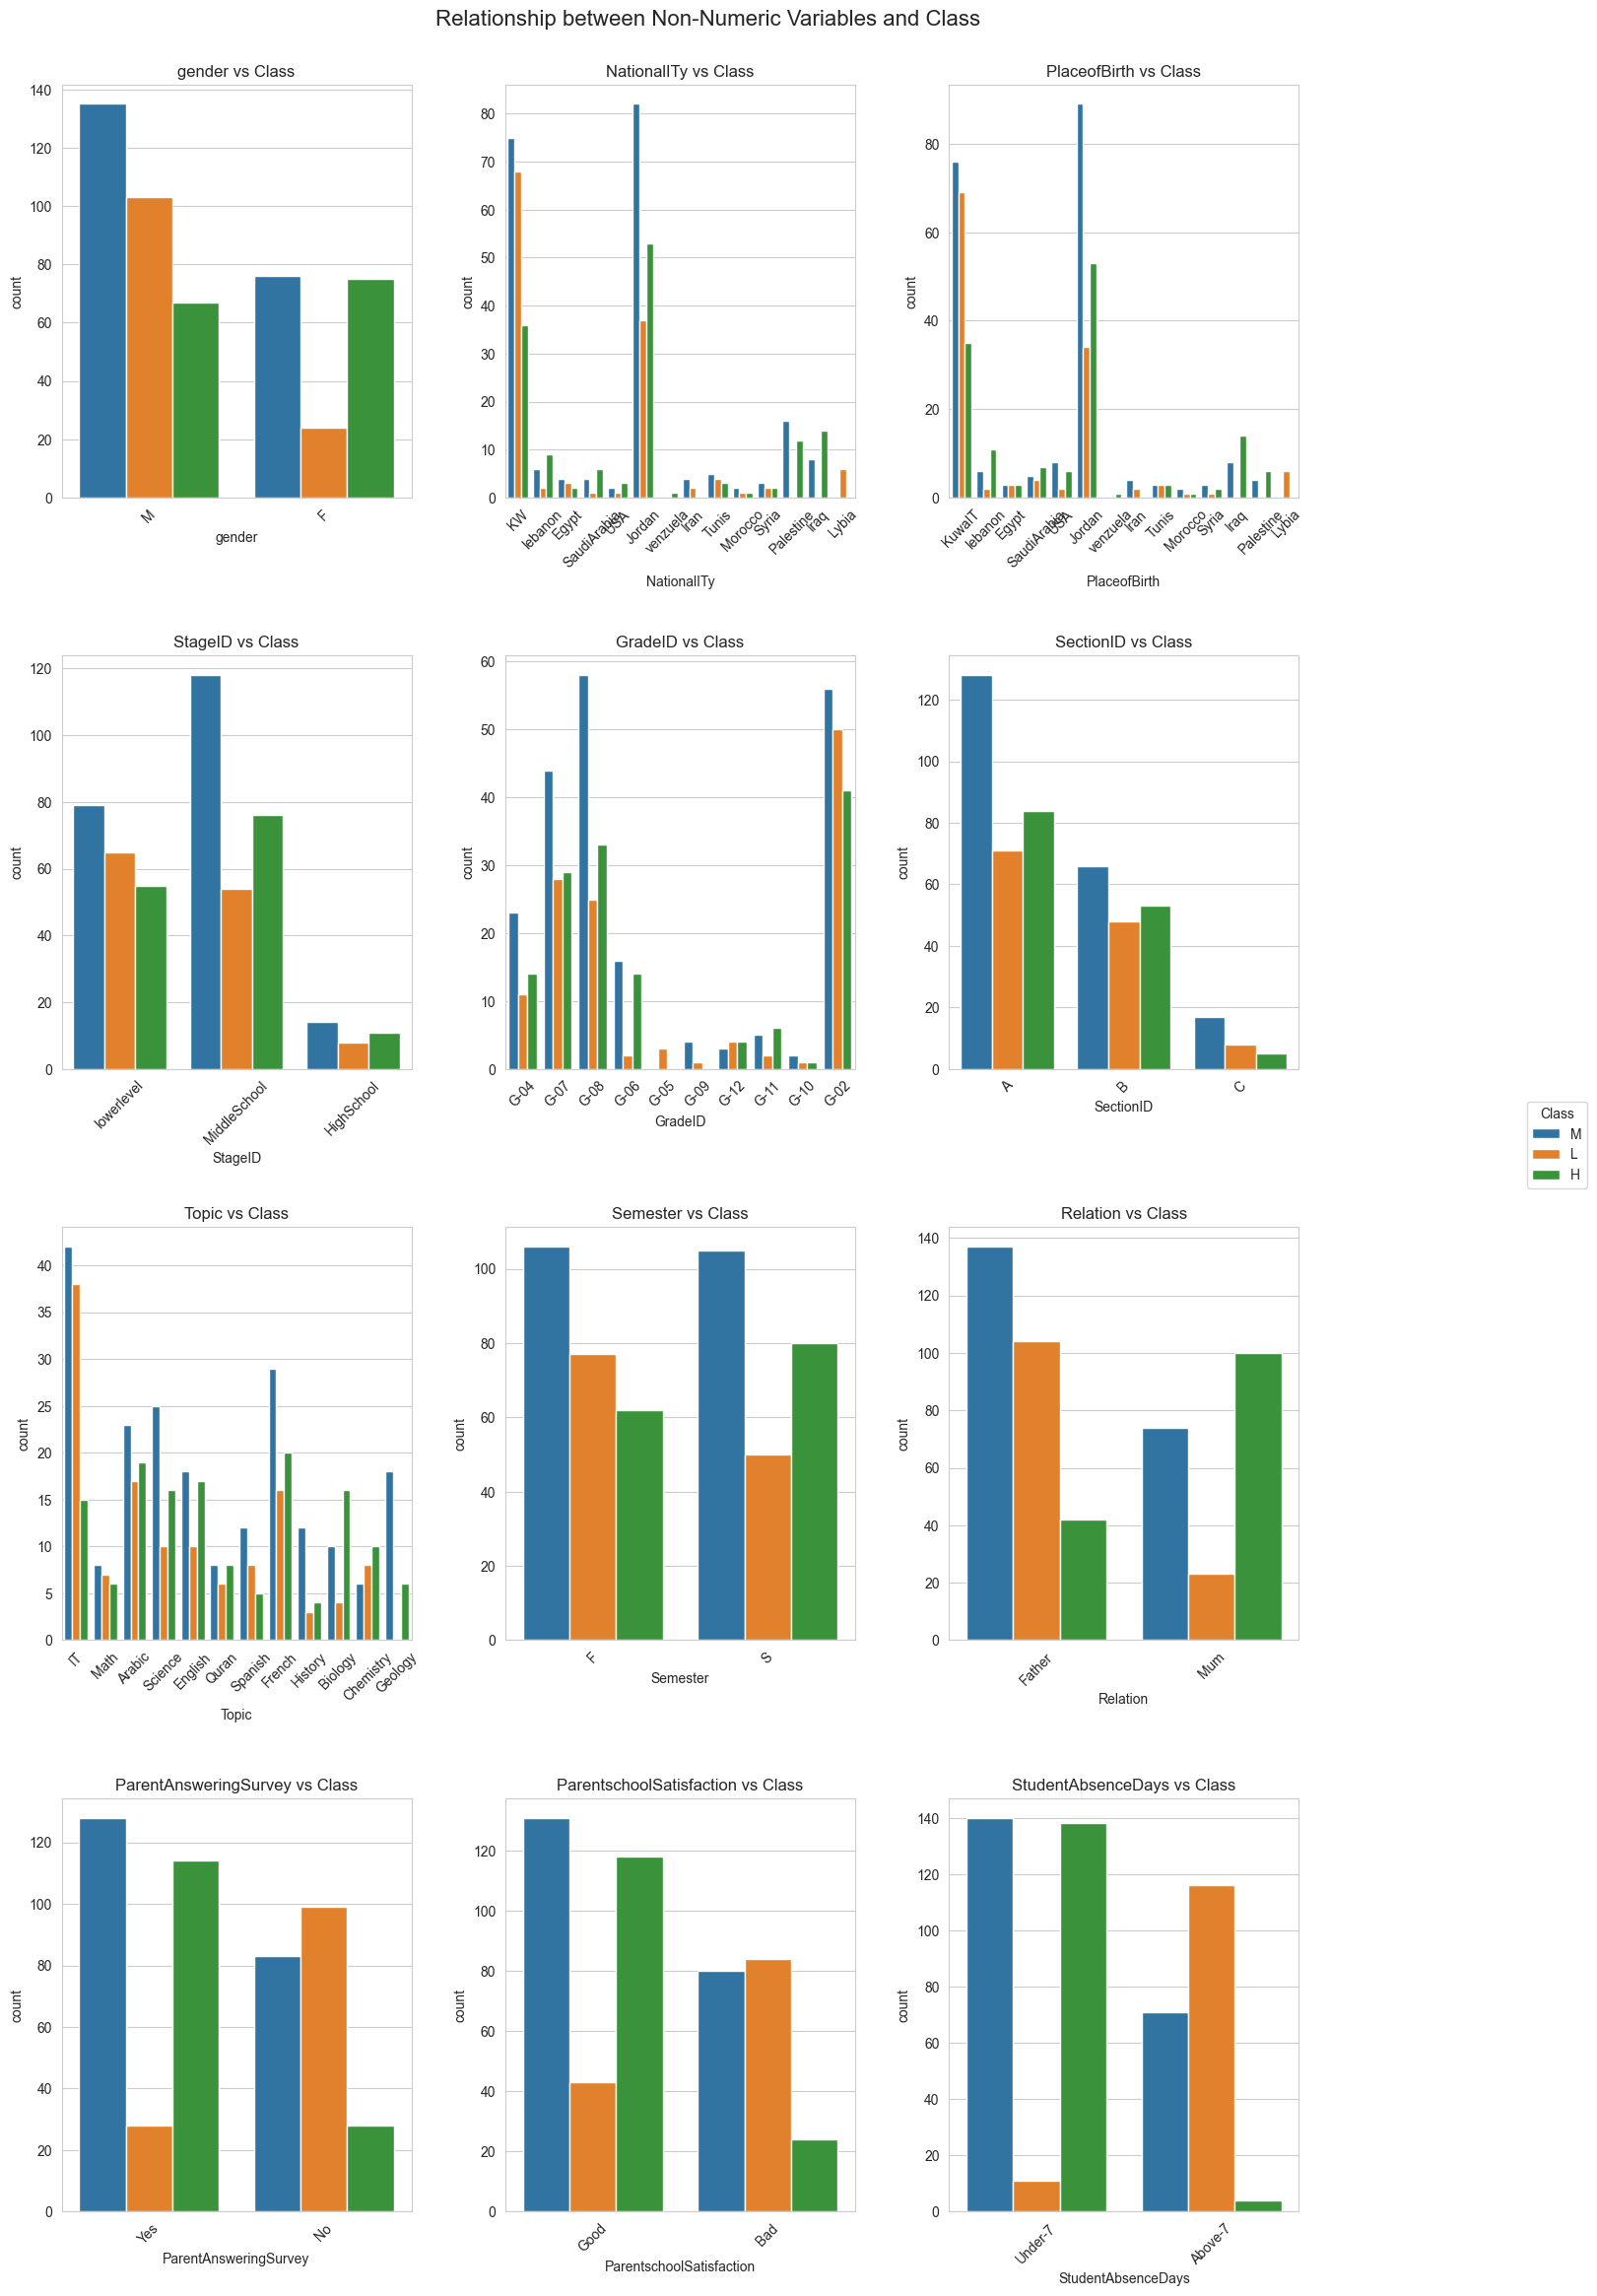

In [9]:

# Select the explanatory variables (excluding the target variable)
explanatory_df = education_df.drop("Class", axis=1)
non_numeric_variables = explanatory_df.select_dtypes(exclude=[np.number]).columns


# Create subplots for each variable
fig, axes = plt.subplots(4, 3, figsize=(15, 24))
fig.suptitle('Relationship between Non-Numeric Variables and Class', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each explanatory variable and plot the relationship with the target variable
for i, variable in enumerate(non_numeric_variables):
    sns.countplot(education_df, x=variable, hue='Class', ax=axes[i])
    axes[i].set_title(f"{variable} vs Class")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend().remove()  # Remove individual legends

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Class', loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout(pad=3)
plt.subplots_adjust(right=0.9)  # Adjust to make room for the legend
plt.show()

## Préparation des donées

### OneHotEncoding ou OrdinalEncoding des variables explicatives

In [10]:

# Select the explanatory variables for encoding
explanatory_df = education_df.drop("Class", axis=1) 
explanatory_variables =explanatory_df.columns
# Perform label encoding
label_encoder = LabelEncoder()
education_encoded_df = education_df.copy()  # Create a copy of the original DataFrame

for column in explanatory_variables:
    education_encoded_df[column] = label_encoder.fit_transform(education_df[column])

# Print the encoded dataframe
print(education_encoded_df)

     gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0         1            4             4        2        1          0      7   
1         1            4             4        2        1          0      7   
2         1            4             4        2        1          0      7   
3         1            4             4        2        1          0      7   
4         1            4             4        2        1          0      7   
..      ...          ...           ...      ...      ...        ...    ...   
475       0            3             3        1        5          0      2   
476       0            3             3        1        5          0      5   
477       0            3             3        1        5          0      5   
478       0            3             3        1        5          0      6   
479       0            3             3        1        5          0      6   

     Semester  Relation  raisedhands  VisITedResources  Announc

### Mettez à la même echelle les variables numériques

In [11]:
# Identify numeric columns for scaling
columns_to_scale = education_encoded_df.select_dtypes(include=[np.number]).columns


# Perform standardization (mean=0, variance=1)
scaler = StandardScaler()
education_scaled = education_encoded_df.copy()
education_scaled[columns_to_scale] = scaler.fit_transform(education_encoded_df[columns_to_scale]).round(3)


education_scaled.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0.757,-0.14,-0.152,1.085,-0.774,-0.773,0.515,-0.979,-0.834,-1.005,-1.143,-1.386,-0.864,0.882,0.802,0.813,M
1,0.757,-0.14,-0.152,1.085,-0.774,-0.773,0.515,-0.979,-0.834,-0.793,-1.001,-1.346,-0.660,0.882,0.802,0.813,M
2,0.757,-0.14,-0.152,1.085,-0.774,-0.773,0.515,-0.979,-0.834,-1.218,-1.461,-1.467,-0.455,-1.134,-1.246,-1.230,L
3,0.757,-0.14,-0.152,1.085,-0.774,-0.773,0.515,-0.979,-0.834,-0.410,-0.859,-1.265,-0.251,-1.134,-1.246,-1.230,L
4,0.757,-0.14,-0.152,1.085,-0.774,-0.773,0.515,-0.979,-0.834,-0.155,-0.187,-0.983,0.281,-1.134,-1.246,-1.230,M


### Séparation de la donnée

In [12]:
# Séparer les données en features et target
X = education_scaled.drop('Class', axis=1)# Features
y = education_scaled['Class'] # Target

## Modèle simple

In [13]:
# Diviser les données en train(60%), validation(20%) et test(20%)

# Divide the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide the remaining training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [15]:
print(Score)

0.7708333333333334


Le modèle de régression logistique a obtenu un accuracy score de 0,7708, ce qui indique qu'il a correctement prédit les labels de classe pour environ 77.08% des cas dans l'ensemble de test.

In [16]:
print(Report)

              precision    recall  f1-score   support

           H       0.72      0.59      0.65        22
           L       0.78      0.96      0.86        26
           M       0.78      0.75      0.77        48

    accuracy                           0.77        96
   macro avg       0.76      0.77      0.76        96
weighted avg       0.77      0.77      0.77        96



Le rapport de classification fournit des mesures d'évaluation plus détaillées pour chaque classe.

Pour la classe H :

- Précision : Le modèle a prédit la classe "H" correctement 72% du temps sur tous les cas prédits comme "H".
- Rappel: De tous les cas appartenant à la classe "H", le modèle a correctement identifié 59% d'entre eux comme "H".
- Score F1 : La moyenne harmonieuse de précision et de rappel pour la classe "H" est de 0,65. Il représente l'équilibre entre la précision et le rappel.

Meme reflection pour les autres classe.



Bonne performance du modèle pour les classes "L" et "M", avec des scores de précision, de rappel et de F1 allant de 0,78 à 0,96. Cependant, pour la classe "H", les performances du modèle étaient relativement inférieures, avec des notes de précision, de rappel et de F1 autour de 0,72, 0,59 et 0,65 respectivement.

Dans l'ensemble, le modèle montre des performances prometteuses, mais il vaut peut-être la peine d'enquêter sur les moyens d'améliorer les prédiction pour la classe "H" afin d'obtenir une meilleure précision et rappel.

## Amélioration de la performance du modèle de régression logistique

### 1. Feature selection 

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Perform feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'ParentAnsweringSurvey', 'StudentAbsenceDays'],
      dtype='object')


In [18]:
X= X[selected_features]
X.head()

,raisedhands,VisITedResources,AnnouncementsView,ParentAnsweringSurvey,StudentAbsenceDays
0,-1.005,-1.143,-1.386,0.882,0.813
1,-0.793,-1.001,-1.346,0.882,0.813
2,-1.218,-1.461,-1.467,-1.134,-1.230
3,-0.410,-0.859,-1.265,-1.134,-1.230
4,-0.155,-0.187,-0.983,-1.134,-1.230


In [19]:
# Divide the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide the remaining training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [20]:
print(Score)

0.8333333333333334


In [21]:
print(Report)

              precision    recall  f1-score   support

           H       0.73      0.86      0.79        22
           L       0.81      1.00      0.90        26
           M       0.92      0.73      0.81        48

    accuracy                           0.83        96
   macro avg       0.82      0.86      0.83        96
weighted avg       0.85      0.83      0.83        96



### 2. Hyperparameter tuning using grid search

In [22]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for grid search
param_grid = {
    'C': [0.1,0.5,1,5,10],
    'penalty': ['l2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=Logit_Model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new logistic regression model with the best hyperparameters
best_logit_model = LogisticRegression(**best_params)

# Fit the model on the training data
best_logit_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_logit_model.predict(X_test)

In [23]:
# Print the predicted labels
print(predictions)

# Calculate and print the accuracy score
accuracy_score = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_score)

['L' 'L' 'H' 'H' 'H' 'L' 'L' 'L' 'M' 'M' 'H' 'M' 'M' 'L' 'H' 'H' 'L' 'M'
 'L' 'M' 'H' 'H' 'L' 'M' 'L' 'L' 'H' 'M' 'L' 'M' 'M' 'M' 'L' 'H' 'M' 'M'
 'M' 'L' 'H' 'M' 'M' 'H' 'L' 'H' 'H' 'L' 'H' 'M' 'H' 'M' 'M' 'M' 'L' 'M'
 'M' 'M' 'L' 'H' 'M' 'L' 'M' 'L' 'L' 'M' 'M' 'M' 'L' 'H' 'L' 'H' 'L' 'H'
 'M' 'M' 'M' 'L' 'M' 'L' 'L' 'H' 'H' 'M' 'L' 'H' 'M' 'L' 'M' 'L' 'L' 'M'
 'H' 'H' 'M' 'M' 'L' 'H']
Accuracy: 0.8333333333333334
